## Rotation of a 3D point about an arbitrary axis

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import math

In [2]:
#for interactive viewing
%matplotlib notebook

In [3]:
# euler rotation
# https://stackoverflow.com/a/6802723
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

A rotation about the origin is represented by four real numbers, $ {{a}}, {{b}}, {{c}}, {{d}} $ such that

$ a^2 + b^2 + c^2 + d^2 = 1. $

When the rotation is applied, a point at position $\vec x_1$ rotates to its new position, $\vec x_2$

$$\vec x_2 = \begin{pmatrix} a^2+b^2-c^2-d^2 & 2(bc-ad) & 2(bd + ac) \\
                                       2(bc+ad) & a^2+c^2-b^2-d^2 & 2(cd - ab) \\
                                       2(bd-ac) & 2(cd+ab) & a^2+d^2-b^2-c^2 \end{pmatrix}\vec x_1 $$

## Simple test

In [4]:
v = [0,0.2,0.4] # random point
axis = [0.021936597, -0.107485786, 0.32540607] # arbitrary axis
vrot = []

for i in range(1,20):
    theta = (i/10)*np.pi
    vrot.append(np.dot(rotation_matrix(axis, theta), v))

<IPython.core.display.Javascript object>


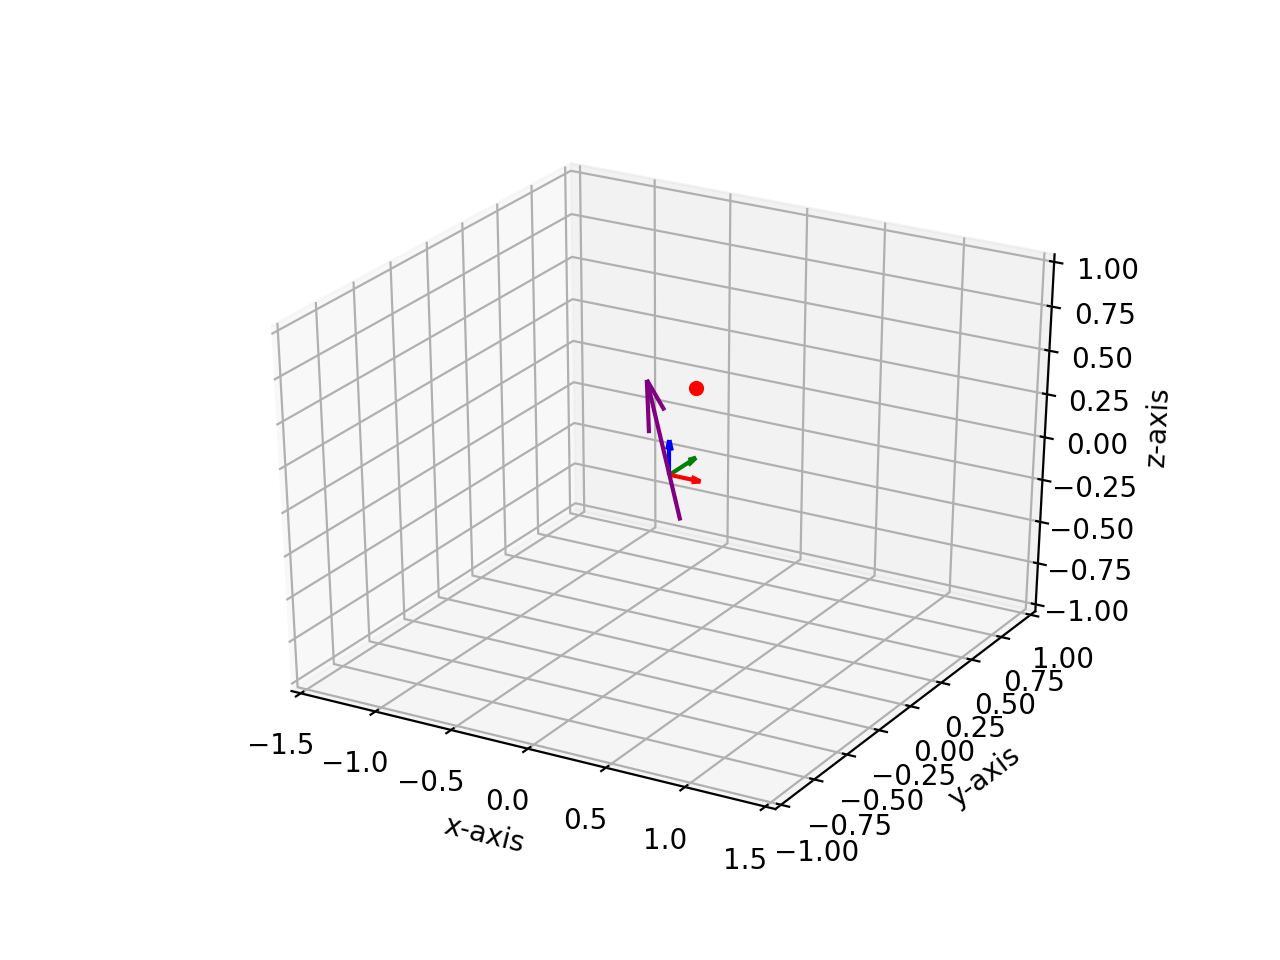

In [5]:
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto') ##############

ax.set_xlim3d([-1.5, 1.5])
ax.set_zlim3d([-1, 1])
ax.set_ylim3d([-1.0, 1.0])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# arbitrary axis
soa = np.array([[axis[0]*-1,axis[1]*-1,axis[2]*-1, 
                 axis[0]*3,axis[1]*3,axis[2]*3]])

X, Y, Z, U, V, W = zip(*soa)
ax.quiver(X, Y, Z, U, V, W, color='purple', arrow_length_ratio=0.3)

# original random point 'v'
ax.scatter3D(v[0], v[1], v[2], c='red')

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis

plt.show()

<IPython.core.display.Javascript object>


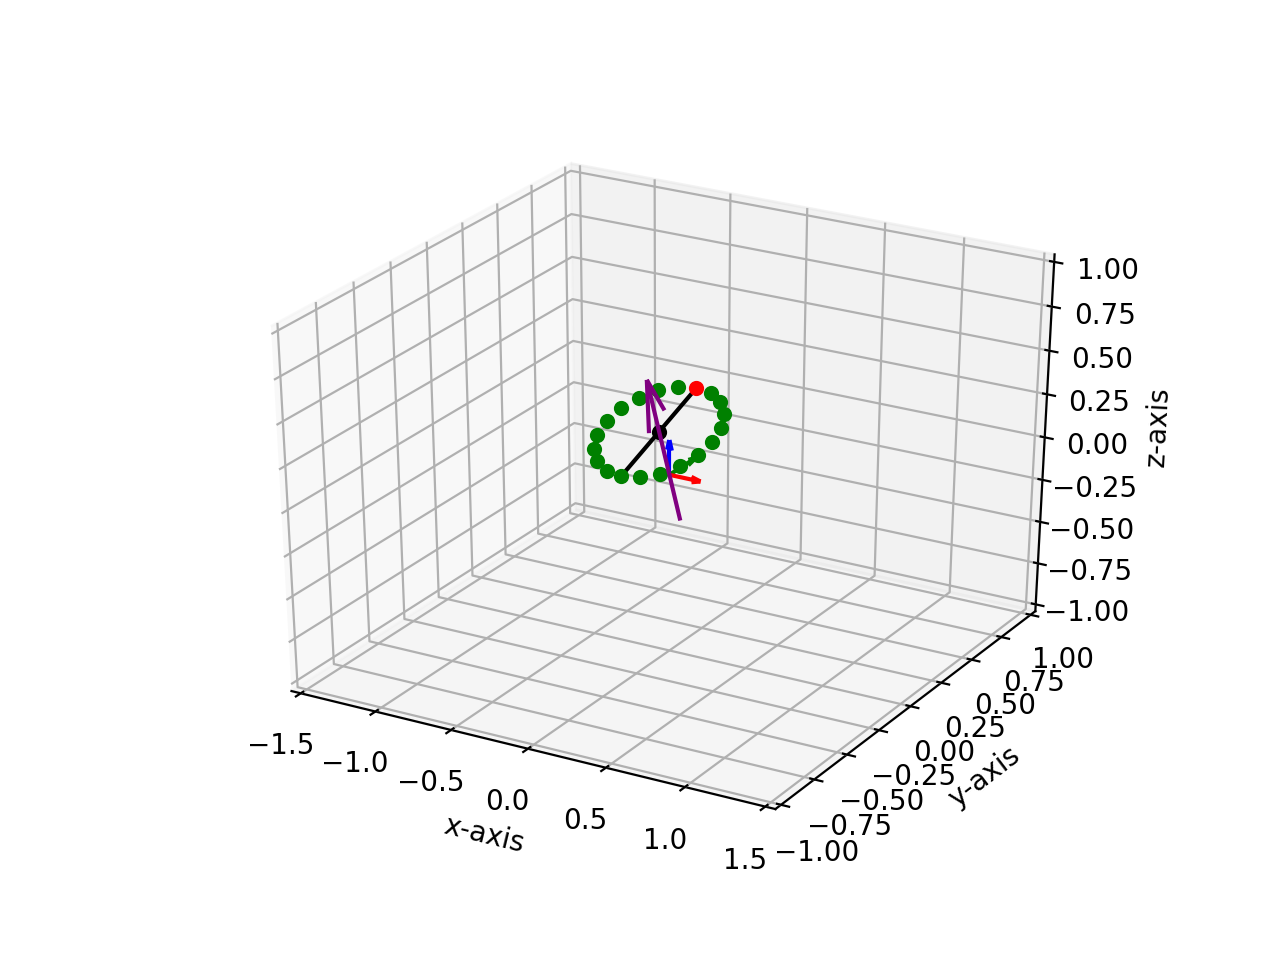

In [6]:
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto') ##############

ax.set_xlim3d([-1.5, 1.5])
ax.set_zlim3d([-1, 1])
ax.set_ylim3d([-1.0, 1.0])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# arbitrary axis
soa = np.array([[axis[0]*-1,axis[1]*-1,axis[2]*-1, 
                 axis[0]*3,axis[1]*3,axis[2]*3]])

X, Y, Z, U, V, W = zip(*soa)
ax.quiver(X, Y, Z, U, V, W, color='purple', arrow_length_ratio=0.3)

ax.scatter3D(v[0], v[1], v[2], c='red')

for i in range(len(vrot)):
    ax.scatter3D(vrot[i][0], vrot[i][1], vrot[i][2], c='g')

# vector visualization of original point and pi rotation point (180 degrees)
point = 9
ax.plot([v[0], vrot[point][0]], [v[1], vrot[point][1]], [v[2], vrot[point][2]], c='k')
midx = (v[0] + vrot[point][0])/2
midy = (v[1] + vrot[point][1])/2
midz = (v[2] + vrot[point][2])/2
ax.scatter3D(midx,midy,midz, c='black')

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis

plt.show()

## Rotation of multiple 3D points

In [7]:
class_name = 'nwalk'
file_name = 'chaehyun'

# uploading 3D human pose estimation data
data_3d = np.load('output3D/out_pose3D_{}_{}.npy'.format(file_name, class_name))

In [8]:
# human joints fragments
bones_3d = [[0, 1, 0],
            [1, 2, 0],
            [3, 2, 0],
            [0, 4, 1],
            [4, 5, 1],
            [6, 5, 1],
            [0, 7, 1],
            [8, 7, 1],
            [9, 8, 1],
            [10, 9, 1],
            [11, 8, 1],
            [12, 11, 1],
            [12, 13, 1],
            [14, 8, 0],
            [15, 14, 0],
            [15, 16, 0]] #0 == red/right, 1 == black/left

<IPython.core.display.Javascript object>


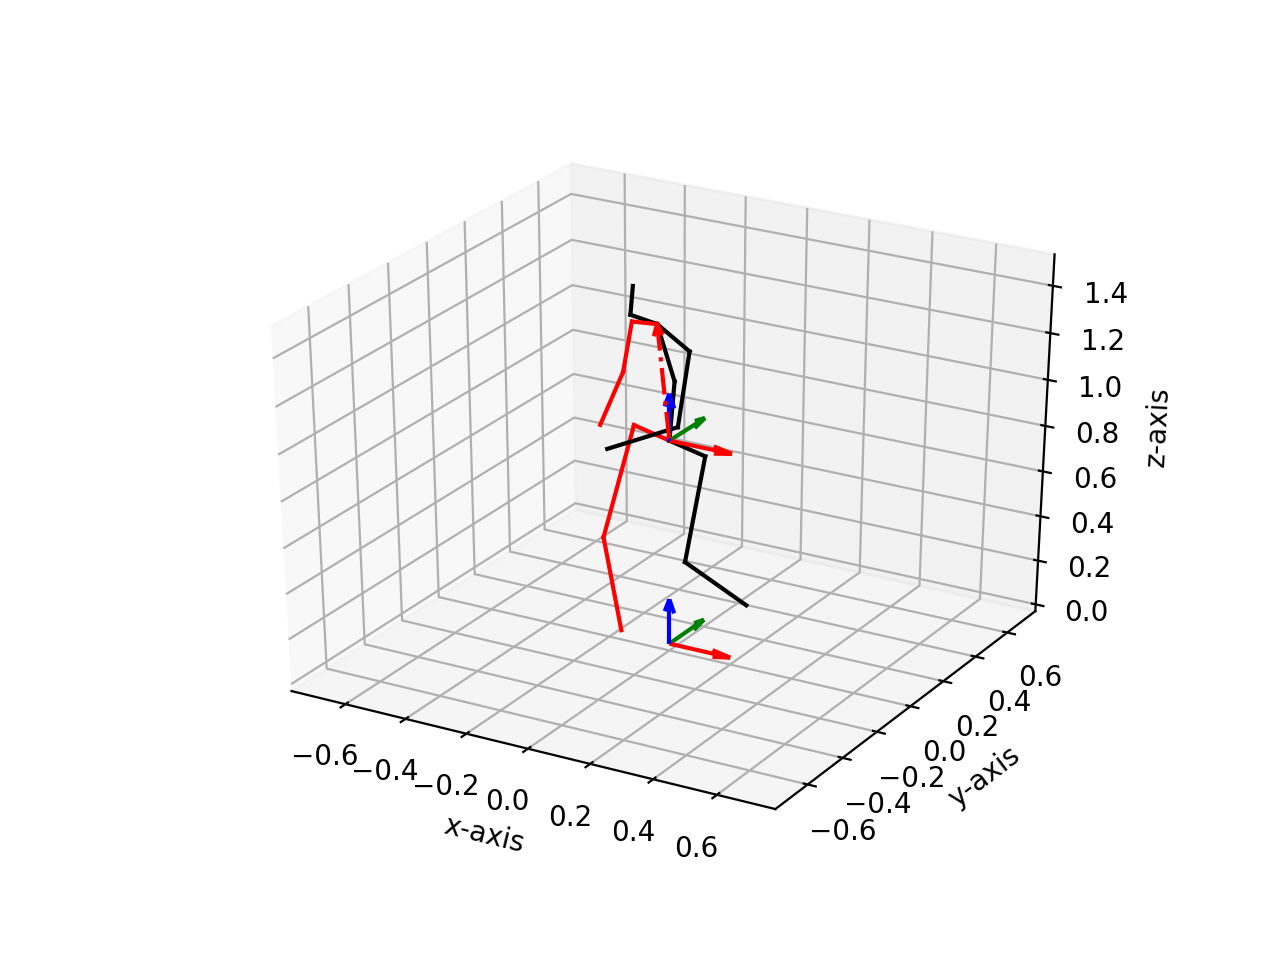

In [9]:
frame_idx = 0 # visualization of no.0 frame
radius = 1.5

plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto') ##############

ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([0, radius])
ax.set_ylim3d([-radius/2, radius/2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# rotation about the neck-pelvis vector
soa = [data_3d[frame_idx][0]]
soa1 = [data_3d[frame_idx][8]-data_3d[frame_idx][0]] #[neck-pelvis]

X, Y, Z = zip(*soa)
U, V, W = zip(*soa1)
ax.quiver(X, Y, Z, U, V, W, color='red', arrow_length_ratio=0.1, linestyle='dashdot')

# visualization of the original 3D human skeleton
for bone in bones_3d:
    start = bone[0]
    end = bone[1]
    
    if bone[2]== 1: col = 'black' 
    else: col = 'red'

    x = [(data_3d[frame_idx][start][0]), (data_3d[frame_idx][end][0])]
    y = [(data_3d[frame_idx][start][1]), (data_3d[frame_idx][end][1])]
    z = [(data_3d[frame_idx][start][2]), (data_3d[frame_idx][end][2])]
    
    ax.plot(x, y, z, c = col)

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis , label = 'x'
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis , label = 'y'
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis , label = 'z'

ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0.2,0,0, color='r') #x-axis
ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0,0.2,0, color='g') #y-axis
ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0,0,0.2, color='b') #z-axis

plt.show()

### Rotation about neck-pelvis vector (calculation)

In [10]:
# rearranging joint data by aligning pelvis as [0,0,0]
new_point = []

for i in data_3d[frame_idx]:
    x = i[0]-data_3d[frame_idx][0][0] 
    y = i[1]-data_3d[frame_idx][0][1]
    z = i[2]-data_3d[frame_idx][0][2]
    new_point.append([x,y,z])
    
new_point = np.asarray(new_point)
new_point

array([[ 0.        ,  0.        ,  0.        ],
       [-0.13668099,  0.03833397,  0.00970209],
       [-0.15258676, -0.10716903, -0.41079903],
       [-0.12213615, -0.06366855, -0.84025496],
       [ 0.13669965, -0.03833485, -0.009745  ],
       [ 0.11085206, -0.10447365, -0.44217864],
       [ 0.15392858,  0.17418182, -0.7699002 ],
       [ 0.00834556,  0.0142327 ,  0.24775642],
       [-0.02356355, -0.02646452,  0.4979052 ],
       [-0.05881761, -0.11034936,  0.5654246 ],
       [-0.05699553, -0.09947747,  0.6790783 ],
       [ 0.11407543, -0.08762738,  0.4492895 ],
       [ 0.14288649, -0.20131962,  0.19570738],
       [-0.04297917, -0.2663616 ,  0.08351642],
       [-0.1501439 ,  0.05291435,  0.43877977],
       [-0.21984166,  0.12100363,  0.17449051],
       [-0.28335178,  0.09957889, -0.06039268]], dtype=float32)

In [11]:
# rotation vector of the rearranged data
rot_vector = new_point[8]-new_point[0]
rot_vector

array([-0.02356355, -0.02646452,  0.4979052 ], dtype=float32)

In [12]:
# euler rotation about the neck-pelvis vector
v = new_point 
axis = rot_vector
vrot = []

for i in v:
    theta = np.pi
    vrot.append(np.dot(rotation_matrix(axis, theta), i))
    
vrot

[array([0., 0., 0.]),
 array([ 0.13535003, -0.03982879,  0.01842157]),
 array([ 0.19005677,  0.14925207, -0.38095407]),
 array([ 0.20040311,  0.15157115, -0.81355031]),
 array([-0.13536456,  0.0398343 , -0.01846572]),
 array([-0.06923932,  0.15120944, -0.43711153]),
 array([-0.07986627, -0.09100151, -0.79505958]),
 array([-0.03156929, -0.04031555,  0.2429681 ]),
 array([-0.02356355, -0.02646452,  0.49790519]),
 array([0.00475494, 0.0496309 , 0.57693644]),
 array([-0.00770779,  0.02680836,  0.68812315]),
 array([-0.15631693,  0.04018542,  0.44328655]),
 array([-0.16168788,  0.18020354,  0.2015719 ]),
 array([0.03358929, 0.2558157 , 0.11489467]),
 array([ 0.10841806, -0.09977718,  0.44290049]),
 array([ 0.20303512, -0.13987926,  0.18063694]),
 array([ 0.28827478, -0.0940498 , -0.04363193])]

In [13]:
# realigning the joint data to the original state
rot_point = []

for i in vrot:
    x = i[0]+data_3d[0][0][0]
    y = i[1]+data_3d[0][0][1]
    z = i[2]+data_3d[0][0][2]
    rot_point.append([x,y,z])
    
rot_point = np.asarray(rot_point)

<IPython.core.display.Javascript object>


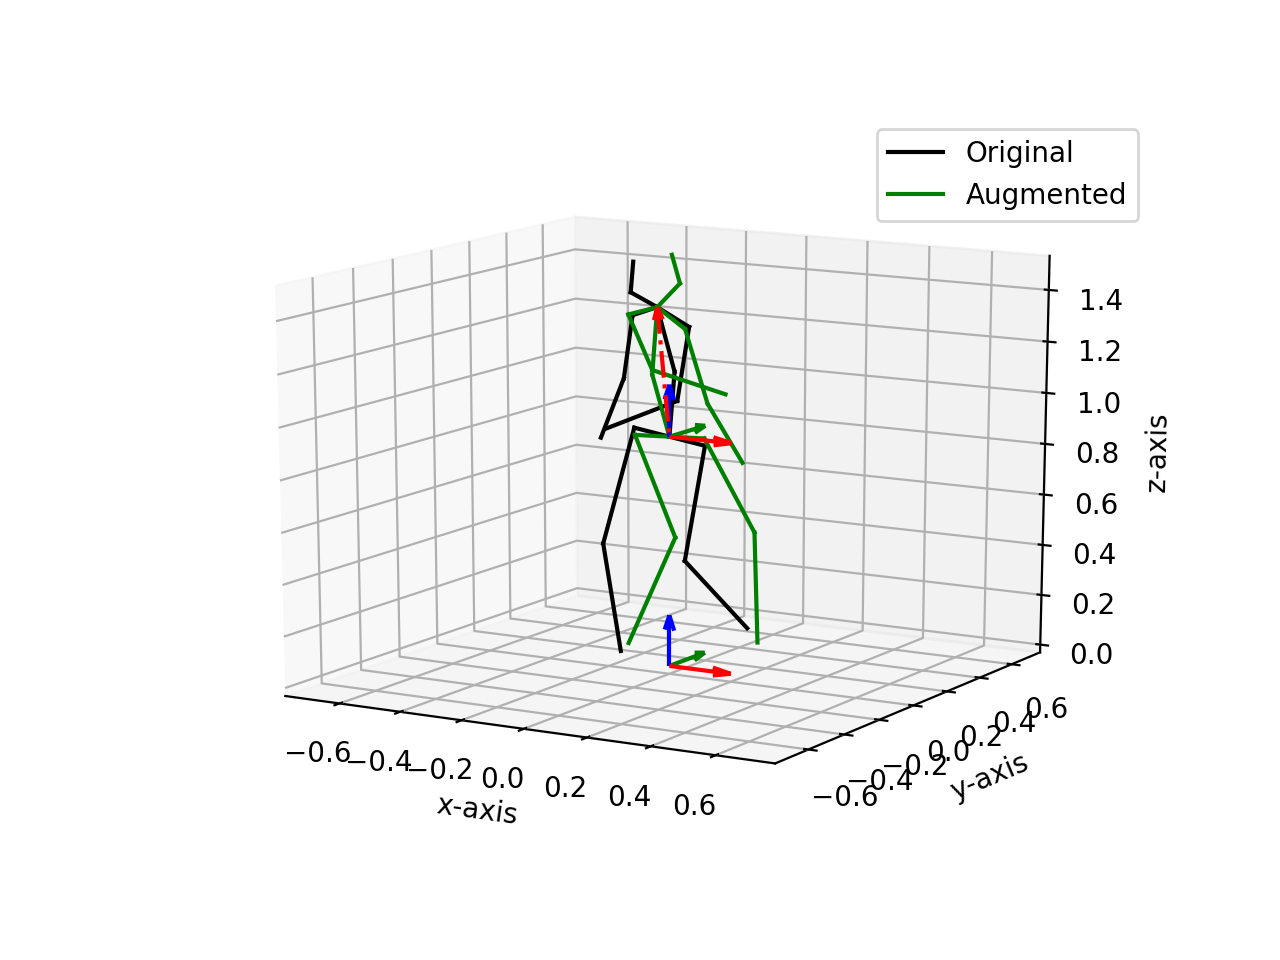

In [15]:
frame_idx = 0
radius = 1.5

plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([0, radius])
ax.set_ylim3d([-radius/2, radius/2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# rotation about the neck-pelvis vector
soa = [data_3d[frame_idx][0]]
soa1 = [data_3d[frame_idx][8]-data_3d[frame_idx][0]] #[neck-pelvis]

X, Y, Z = zip(*soa)
U, V, W = zip(*soa1)
ax.quiver(X, Y, Z, U, V, W, color='red', arrow_length_ratio=0.1, linestyle='dashdot')

# visualization of the original 3D human skeleton
for bone in bones_3d:
    start = bone[0]
    end = bone[1]
    
    col = 'black'
    if bone[1] == 16: label = 'Original'
    else: label = '_nolegend_'

    x = [(data_3d[frame_idx][start][0]), (data_3d[frame_idx][end][0])]
    y = [(data_3d[frame_idx][start][1]), (data_3d[frame_idx][end][1])]
    z = [(data_3d[frame_idx][start][2]), (data_3d[frame_idx][end][2])]
    
    lines = ax.plot(x, y, z, c = col, label = label)

# visualization of the rotated 3D human skeleton
for bone in bones_3d:
    start = bone[0]
    end = bone[1]
    
    col = 'green'
    if bone[1] == 16: label = 'Augmented'
    else: label = '_nolegend_'

    x = [(rot_point[start][0]), (rot_point[end][0])]
    y = [(rot_point[start][1]), (rot_point[end][1])]
    z = [(rot_point[start][2]), (rot_point[end][2])]
    
    lines = ax.plot(x, y, z, c = col, label = label)


ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis , label = 'x'
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis , label = 'y'
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis , label = 'z'

ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0.2,0,0, color='r') #x-axis
ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0,0.2,0, color='g') #y-axis
ax.quiver(data_3d[frame_idx][0][0],data_3d[frame_idx][0][1],data_3d[frame_idx][0][2],0,0,0.2, color='b') #z-axis

plt.legend(fontsize = 10)
plt.show()